<a href="https://colab.research.google.com/github/rayansyed43/Customer-Churn-Prediction/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title - Customer Churn Prediction

**Important** - Do change your "Runtime type" to "T4 GPU" for faster execution

## Stage - 1: Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("customer_churn_large_dataset.csv")

In [ ]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [ ]:
print(df.dtypes) #To check all the data-types present in the given dataset

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object


In [ ]:
df.isnull().sum() #No missing data in the dataset

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [ ]:
df.shape #shows total number of rows and columns present in the given dataset

(100000, 9)

In [ ]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [ ]:
df.sort_values(by='Subscription_Length_Months')
#Sorting the dataset according to "Subscription_Length_Months" so that it can be compared with "Location" and "Monthly_Bill"

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
62463,62464,Customer_62464,47,Female,Los Angeles,1,77.09,317,1
13087,13088,Customer_13088,47,Female,Houston,1,34.75,331,1
39830,39831,Customer_39831,36,Male,Los Angeles,1,89.08,373,0
81168,81169,Customer_81169,70,Male,Chicago,1,99.46,134,1
36951,36952,Customer_36952,54,Male,Miami,1,92.21,125,0
...,...,...,...,...,...,...,...,...,...
73859,73860,Customer_73860,47,Female,Chicago,24,39.38,221,1
28217,28218,Customer_28218,53,Male,Chicago,24,93.88,122,0
28212,28213,Customer_28213,70,Male,Miami,24,83.52,132,0
86525,86526,Customer_86526,53,Male,Los Angeles,24,90.44,293,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder #Used to convert string datatype columns into numerical type.

In [ ]:
label_encoder = LabelEncoder()
df['Name_encoded'] = label_encoder.fit_transform(df['Name'])
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])
df['Location_encoded'] = label_encoder.fit_transform(df['Location'])

In [ ]:
columns_to_drop = ['Name', 'Gender', 'Location']
df=df.drop(columns_to_drop, axis=1)

In [ ]:
print(df.dtypes) #To check if the said changes have occured or not

CustomerID                      int64
Age                             int64
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
Name_encoded                    int64
Gender_encoded                  int64
Location_encoded                int64
dtype: object


Below cell contains a python library known as "pygwalker".

This library provides a tableau-like UI here itself that can be used to make desired visualizations.

In [ ]:
# !pip install pygwalker -q
# import pygwalker as pyg
# gwalker = pyg.walk(df)

## Stage - 2: Feature Engineering

In [ ]:
df['avg_usage_per_month_GB'] = df['Total_Usage_GB'] / df['Subscription_Length_Months']
df['avg_usage_per_month_GB'] #To get the amount of GB used per month by the customer

0         13.882353
1        172.000000
2         92.000000
3         99.000000
4         14.000000
            ...    
99995      9.826087
99996     18.473684
99997     14.764706
99998     21.700000
99999      9.105263
Name: avg_usage_per_month_GB, Length: 100000, dtype: float64

In [ ]:
usage_threshold = df['avg_usage_per_month_GB'].quantile(0.75)
df['high_usage'] = df['avg_usage_per_month_GB'].apply(lambda x: 1 if x > usage_threshold else 0)
df['high_usage'] #To check if the usage is being high when it is compared to 75% of its own.

0        0
1        1
2        1
3        1
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: high_usage, Length: 100000, dtype: int64

In [ ]:
avg_monthly_usage = df['avg_usage_per_month_GB'].mean()
df['usage_ratio'] = df['avg_usage_per_month_GB'] / avg_monthly_usage
df['usage_ratio'] #High ratio is used to check if the customer is using more than the average usage of all the customers.

0        0.320241
1        3.967734
2        2.122276
3        2.283754
4        0.322955
           ...   
99995    0.226670
99996    0.426155
99997    0.340595
99998    0.500580
99999    0.210042
Name: usage_ratio, Length: 100000, dtype: float64

In [ ]:
average_bill_per_location = df.groupby('Location_encoded')['Monthly_Bill'].mean()
df['avg_bill_per_location'] = df['Location_encoded'].map(average_bill_per_location)
#This gives us the average bill that we can get from a particular location.

In [ ]:
df

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Name_encoded,Gender_encoded,Location_encoded,avg_usage_per_month_GB,high_usage,usage_ratio,avg_bill_per_location
0,1,63,17,73.36,236,0,0,1,2,13.882353,0,0.320241,65.192377
1,2,62,1,48.76,172,0,11112,0,4,172.000000,1,3.967734,65.174980
2,3,24,5,85.47,460,0,22223,0,2,92.000000,1,2.122276,65.192377
3,4,36,3,97.94,297,1,33334,0,3,99.000000,1,2.283754,64.951278
4,5,46,19,58.14,266,0,44445,0,3,14.000000,0,0.322955,64.951278
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,33,23,55.13,226,1,99996,1,1,9.826087,0,0.226670,65.127926
99996,99997,62,19,61.65,351,0,99997,0,4,18.473684,0,0.426155,65.174980
99997,99998,64,17,96.11,251,1,99998,1,0,14.764706,0,0.340595,64.819357
99998,99999,51,20,49.25,434,1,99999,0,4,21.700000,0,0.500580,65.174980


In [ ]:
print(df.dtypes)

CustomerID                      int64
Age                             int64
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
Name_encoded                    int64
Gender_encoded                  int64
Location_encoded                int64
avg_usage_per_month_GB        float64
high_usage                      int64
usage_ratio                   float64
avg_bill_per_location         float64
dtype: object


## Stage - 3: Model Building

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(y)

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64


#### Model - 1: Neural Networks

In [ ]:
#!pip install tensorflow

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/20
1000/1000 [==============================] - 10s 3ms/step - loss: 0.6962 - accuracy: 0.4985 - val_loss: 0.6933 - val_accuracy: 0.4942
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6934 - accuracy: 0.5022 - val_loss: 0.6930 - val_accuracy: 0.5081
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6932 - accuracy: 0.5052 - val_loss: 0.6932 - val_accuracy: 0.5064
Epoch 4/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6930 - accuracy: 0.5064 - val_loss: 0.6934 - val_accuracy: 0.4979
Epoch 5/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6932 - accuracy: 0.5066 - val_loss: 0.6932 - val_accuracy: 0.5039
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6931 - accuracy: 0.5098 - val_loss: 0.6932 - val_accuracy: 0.5021
Epoch 7/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6931 - accuracy: 0.5056 - val_loss: 0.6932 - val_accuracy

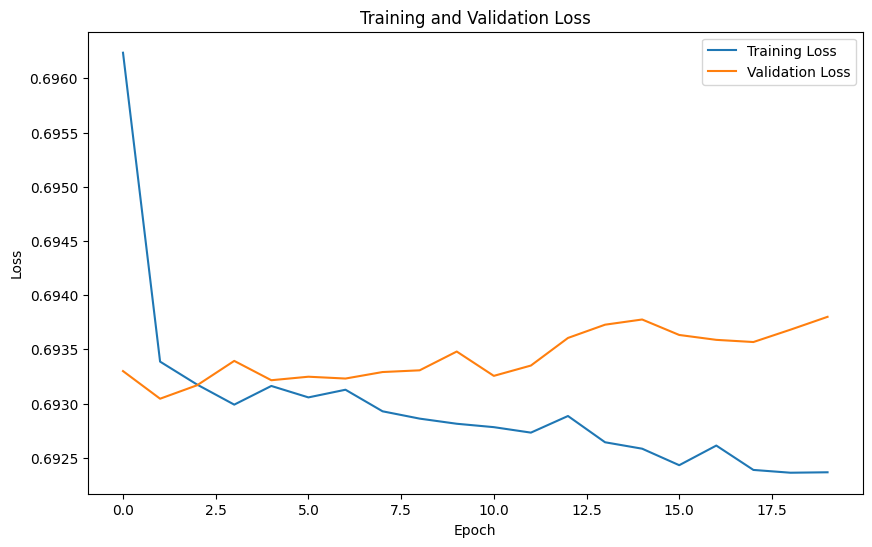

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#### Model - 2: Neural Networks with Regularizer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#With the use of kernel_regularizer
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/20
1000/1000 [==============================] - 5s 4ms/step - loss: 0.7301 - accuracy: 0.5004 - val_loss: 0.7095 - val_accuracy: 0.5002
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.7018 - accuracy: 0.5043 - val_loss: 0.6966 - val_accuracy: 0.5089
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6948 - accuracy: 0.5017 - val_loss: 0.6937 - val_accuracy: 0.4961
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6933 - accuracy: 0.5021 - val_loss: 0.6932 - val_accuracy: 0.4972
Epoch 5/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6931 - val_accuracy: 0.5039
Epoch 7/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy:

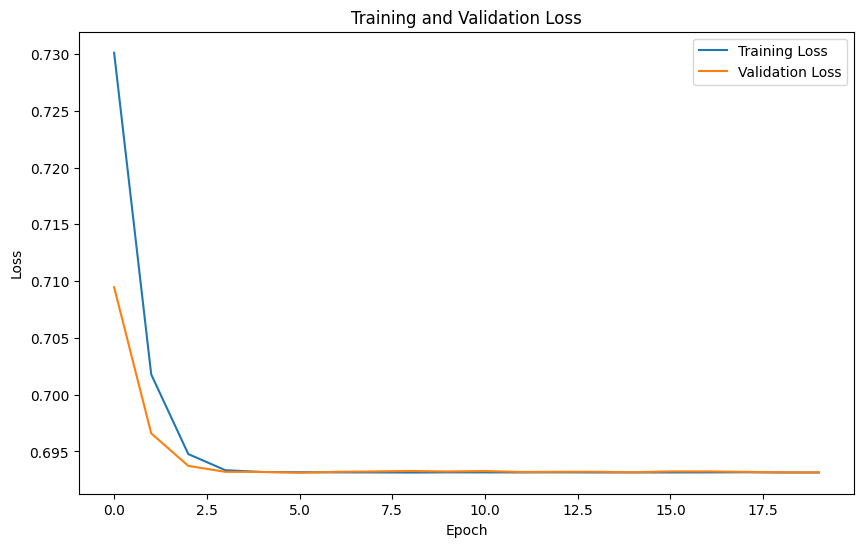

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#### Model - 3: Logistic Regression

In [ ]:
from  sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
probs = probs[:, 1]

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
print(X_train[0:10, :])

[[ 8.72827763e-01  6.53446686e-01 -1.08272837e+00  9.60254546e-01
  -5.33773814e-01  7.78198962e-01 -9.95534968e-01  1.41703505e+00
  -3.48722961e-02 -5.76118587e-01 -3.48722961e-02  8.41406774e-01]
 [-3.69569131e-02 -1.04827574e+00  1.66388226e+00  8.39623539e-01
  -2.73257255e-01 -2.33024506e-01  1.00448506e+00  1.41703505e+00
  -5.06802930e-01 -5.76118587e-01 -5.06802930e-01  8.41406774e-01]
 [-1.75130569e-01  8.49799274e-01 -7.08191867e-02 -6.32173629e-01
  -1.62947581e+00 -3.86587720e-01  1.00448506e+00 -1.41806277e+00
  -5.79651283e-01 -5.76118587e-01 -5.79651283e-01 -1.61937346e+00]
 [-1.26271554e+00 -1.63733351e+00  9.41089993e-01 -1.60710948e+00
  -7.78965870e-01 -1.59534365e+00  1.00448506e+00 -7.09288318e-01
  -5.19772271e-01 -5.76118587e-01 -5.19772271e-01  5.15808394e-01]
 [ 1.47924696e+00  7.84348412e-01 -6.49053004e-01 -1.56014249e+00
   3.01411625e-01  1.45215160e+00 -9.95534968e-01  7.08260595e-01
  -6.14777815e-02 -5.76118587e-01 -6.14777815e-02 -7.06529391e-01]
 [ 4.

In [ ]:
from sklearn.metrics import classification_report
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall: ', recall)

Recall:  0.3950206632395928


In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.5002


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.60      0.55     10079
           1       0.50      0.40      0.44      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



**Note:** I have also tried other algorithms like Support Vector Machine, K-Means, KNN, and also these algorithms with and without “Standard Scaler”, and also with and without “One Hot Encoder” but even they do not have any significant difference in their results.

#### Model - 4: Random Forest Classifier

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4979


In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall: ', recall)

Recall:  0.4652756778550549


In [ ]:
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.52     10079
           1       0.49      0.47      0.48      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



#### Model - 5: XGBoost (Gradient Boosting Algorithm)

In [ ]:
#XGBoost is a boosting technique used to combine multiple weak learners/base learners and combines their output to get better final performance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4968


In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall: ', recall)

Recall:  0.47989114000604777


In [ ]:
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.51     10079
           1       0.49      0.48      0.49      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



## Stage - 4: Model Optimization

Firstly, I've tried to Optimize by using GridSearchCV with LogisticRegression but the accuray and recall were still not satisfactory.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [ ]:
model = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall: ', recall)

Recall:  0.3950206632395928


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5002


In [ ]:
classification_rep = classification_report(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_rep)

Best Parameters: {'C': 1, 'penalty': 'l2'}
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.60      0.55     10079
           1       0.50      0.40      0.44      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



After that, I've tried to use DecisionTreeClassifier through which I was able to find some better results.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 10)
clf.fit(X_train, y_train)

y_train_preds = clf.predict(X_train)
y_test_preds = clf.predict(X_test)
result = pd.DataFrame(clf.predict(X_test), columns = ['Churn'])
dtcr = round(recall_score(y_test, y_test_preds),4)

In [ ]:
print(f'Accuracy: {round(accuracy_score(y_test, y_test_preds),3)}')
print(f'Recall score: {round(recall_score(y_test, y_test_preds),4)}')

Accuracy: 0.505
Recall score: 0.5342


## Stage - 5: Model Development

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = RandomForestClassifier(random_state=42)
model.fit(X_scaled, y)

RandomForestClassifier(random_state=42)

In [ ]:
user_input = {
    'CustomerID': int(input("Enter Random CustomerID: ")),
    'Age': float(input("Enter Age: ")),
    'Subscription_Length_Months': float(input("Enter Subscription Length (Months): ")),
    'Monthly_Bill': float(input("Enter Monthly Bill: ")),
    'Total_Usage_GB': float(input("Enter Total Usage (GB): ")),
    'Name_encoded': int(input("Enter Name Encoded: ")),
    'Gender_encoded': int(input("Enter Gender Encoded (1 for male, 0 for female): ")),
    'Location_encoded': int(input("Enter Location Encoded: ")),
    'high_usage': int(input("Enter High Usage (0 for not high usage, 1 for high usage): ")),
    'avg_usage_per_month_GB': float(input("Enter Average Usage per Month (GB): ")),
    'usage_ratio': float(input("Enter Usage Ratio: ")),
    'avg_bill_per_location': float(input("Enter Average Bill per Location: "))
}


Enter Random CustomerID: 7860
Enter Age: 22
Enter Subscription Length (Months): 14
Enter Monthly Bill: 67
Enter Total Usage (GB): 145
Enter Name Encoded: 44445
Enter Gender Encoded (1 for male, 0 for female): 0
Enter Location Encoded: 2
Enter High Usage (0 for not high usage, 1 for high usage): 1
Enter Average Usage per Month (GB): 107
Enter Usage Ratio: 2.122276
Enter Average Bill per Location: 65.174980


In [ ]:
# Predict churn based on user input
user_input_scaled = scaler.transform([list(user_input.values())])
churn_prediction = model.predict(user_input_scaled)

if churn_prediction[0] == 1:
    print("Churn: Yes")
else:
    print("Churn: No")

Churn: Yes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
